In [4]:
'''Entry point for the particle filtering code, use for the datasets *_FLU_HOSPITALIZATIONS.csv'''

import sys
sys.path.append('../') #appending the path is only necessary for the jupyter notebook

import numpy as np
from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''First thing to do is set up the algorithm object, this is a class which encapsulates the whole particle filter, it contains information about the integrator, the perturber, the resampler, and a 
dataclass which holds metadata and setup information needed at runtime.'''

algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.1,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(population=7_780_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(2),
                        particle_count=100))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":0.1,
"std":10,
"R":50,
"hosp":10,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.15), 
          "D":partial(algo.ctx.rng.uniform,0,15),
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/AZ_FLU_HOSPITALIZATIONS.csv',6)



[93 48 70 48 48 70 48 93 93 48 93 48 93 93 48 24 93 93 48 48 70 93 93 93
 93 48 93 70 48 48 48 48 48 48 24 93 70 48 93 70 93 93 48 93 48 93 93 48
 48 48 48 48 93 70 48 70 48 93 46 48 48 48 93 48 48 46 93 48 93 48 24 48
 93 93 48 93 24 93 48 70 48 93 48 93 48 70 70 93 48 70 48 48 93 48 70 48
 48 48 93 93]
Iteration: 0
[51 11 24 75 33 81 72 62 13 43 87 62  7 47 44 46 40 81 50 84 96 90 75  1
  0 16 48 27 12 93 41 18 48 98 72 92 11 73 31 34 43 44 78 26 44 41 60 52
  4 84 62 13 46 90 88 39 22 96 73 66 40 86 17 82 79 49 35 68 37 40 24 77
 13 46 42 99 10 54 21 96 11 92 63 17 40 25 45 81 45 99 92 19 12 67 33 24
 92 56 24 53]
Iteration: 1
[84 88 73 32 91 37 72 79 68  5 21 77 65 83 69 68 87 92 29 82 95 13 43 53
 54 86  0  6 77 27 45 15 94 48  6 90 57 25  9  2 86 13 22 54  6 71 64 64
 35 28 76 97 58 90 16 75 23 27  2 93 15 23 34 42 80  8  7 22 87 81 89 49
  0 60 27 14 30 72 57 73 62 57 54 77 67 66 33 21 77 63 75 31  1 77 18 74
  5  9 12 15]
Iteration: 2
[64 57 83 97 63 88 33 51 89 21 57 62 29 75 

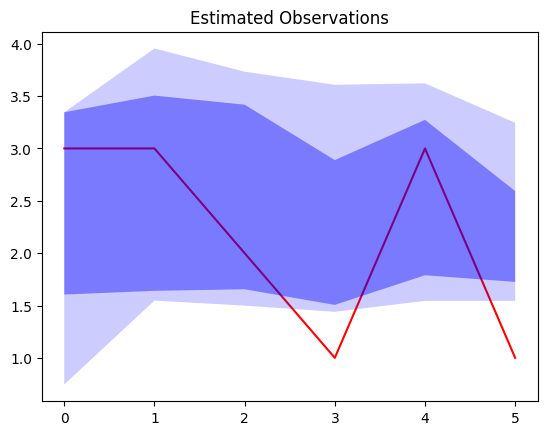

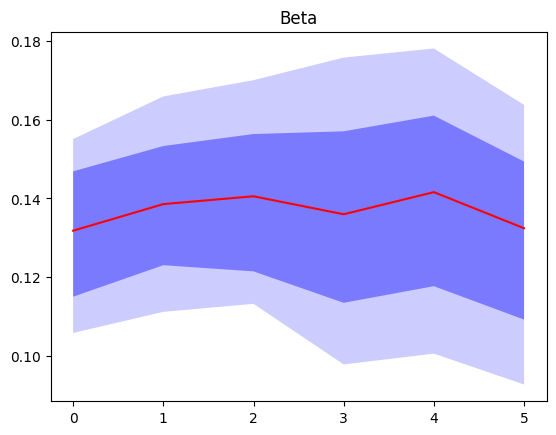

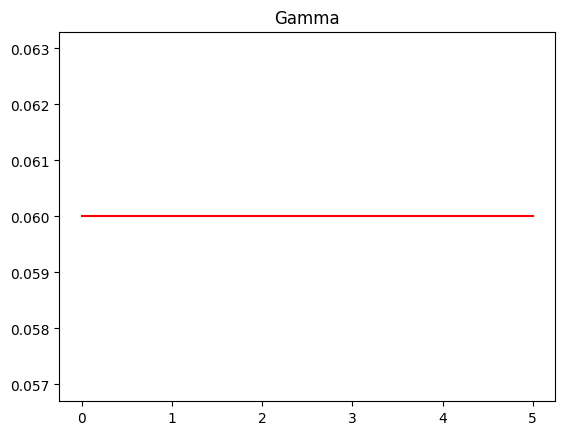

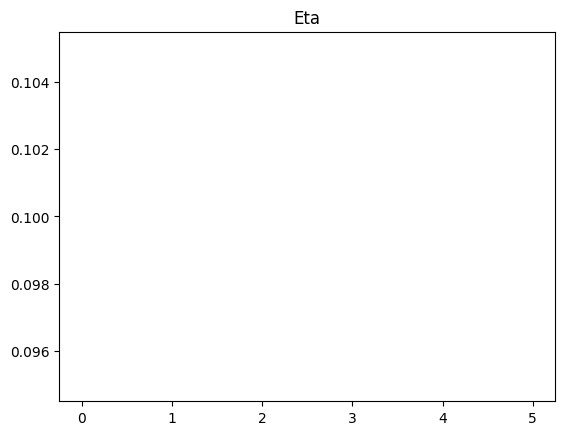

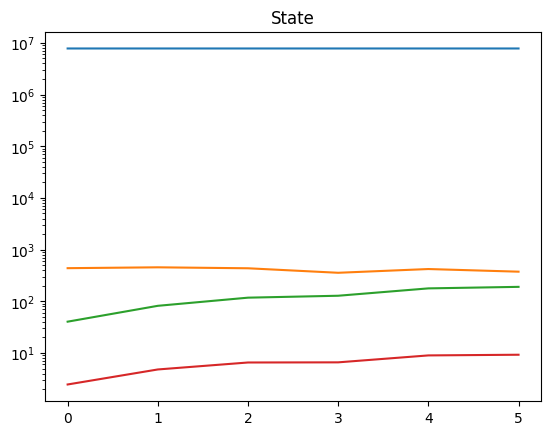

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = pd.read_csv('../datasets/AZ_FLU_HOSPITALIZATIONS.csv').to_numpy()
real_data = np.delete(real_data,0,1)

estimated_data = pd.read_csv('../datasets/particle_observation.csv').to_numpy()
estimated_data = np.delete(estimated_data,0,1)


t = 6

plt.title("Estimated Observations")

plt.fill_between(np.arange(0,t), estimated_data[:,3], estimated_data[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), estimated_data[:,6], estimated_data[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(np.arange(0,t),real_data[0:t],color='red')
plt.show()

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)




beta_quantiles = pd.read_csv('../datasets/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_eta = pd.read_csv('../datasets/average_eta.csv').to_numpy()
pf_eta = np.delete(pf_eta,0,1)
eta_quantiles = pd.read_csv('../datasets/eta_quantiles.csv').to_numpy()
eta_quantiles = np.delete(eta_quantiles,0,1)

pf_gamma = pd.read_csv('../datasets/average_gamma.csv').to_numpy()
pf_gamma = np.delete(pf_gamma,0,1)
gamma_quantiles = pd.read_csv('../datasets/gamma_quantiles.csv').to_numpy()
gamma_quantiles = np.delete(gamma_quantiles,0,1)

pf_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.title("Beta")

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(pf_beta,color="red",zorder=12)
plt.savefig('Beta.png')
plt.show()

plt.title("Gamma")

plt.plot(pf_gamma,zorder=12,color = 'red')
plt.fill_between(np.arange(0,t), gamma_quantiles[:,3], gamma_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), gamma_quantiles[:,6], gamma_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("Eta")

plt.fill_between(np.arange(0,t), eta_quantiles[:,3], eta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), eta_quantiles[:,6], eta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.yscale('log')
plt.title("State")
plt.plot(pf_state)
plt.savefig('State.png')

